## Lab Task 3
Name: Shyju Kozhisseri <br/>
ID: 309572 <br/>
Group: j42323c <br/>

In [1]:
import array
import numpy as np
import pandas as pd
import random
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('xqf131.tsp', sep=' ', skiprows=8, names=['node', 'x', 'y'])
df.head()

,node,x,y
0,1,0,13
1,2,0,26
2,3,0,27
3,4,0,39
4,5,2,0


In [3]:
tour_size = df.shape[0]
tour_size

131

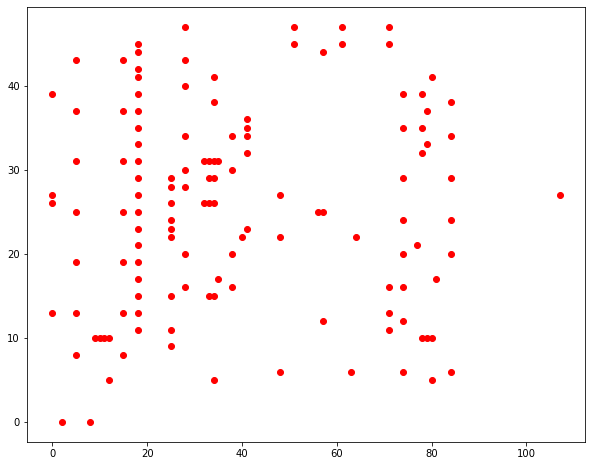

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(df['x'], df['y'], color='red')

In [5]:
distance_map = np.zeros((tour_size, tour_size))
for i in range(tour_size):
    for j in range(tour_size):
        distance_map[i][j] = np.sqrt((df['x'][i] - df['x'][j])**2 + (df['y'][i] - df['y'][j])**2)

In [6]:
random.seed(0)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(tour_size), tour_size)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalTSP(individual):
    distance = distance_map[individual[-1]][individual[0]]
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += distance_map[gene1][gene2]
    return distance,

toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selBest)
toolbox.register("evaluate", evalTSP)

In [7]:
pop = toolbox.population(n=20)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

p = algorithms.eaMuPlusLambda(pop, toolbox, 100, 20000, ngen=1000, stats=stats, halloffame=hof, mutpb=0.6, cxpb=0.4)

gen	nevals	avg    	std    	min   	max    
0  	20    	4658.03	154.043	4468.5	5136.94
1  	20000 	4207.54	53.5888	4050.46	4263.37
2  	20000 	3911.82	43.0583	3761   	3953.74
3  	20000 	3679.7 	34.3363	3559.01	3715.42
4  	20000 	3482.9 	35.6215	3356.86	3522.54
5  	20000 	3310.97	35.8674	3196.94	3349.57
6  	20000 	3159.59	33.5145	2986.69	3191.17
7  	20000 	3006.62	31.3658	2897.11	3045.01
8  	20000 	2881.88	27.8587	2752.38	2908.95
9  	20000 	2760.7 	31.9802	2649.98	2798.51
10 	20000 	2648.29	27.6554	2496.16	2673.63
11 	20000 	2539.49	28.49  	2463.48	2571.65
12 	20000 	2456.14	16.0919	2387.49	2473.33
13 	20000 	2383.92	16.0118	2318.29	2403.07
14 	20000 	2311.8 	16.0789	2254.66	2331.81
15 	20000 	2234.39	19.074 	2177.11	2255.81
16 	20000 	2158.32	15.8947	2088.37	2175.62
17 	20000 	2082.29	16.5369	2013.61	2100.77
18 	20000 	2012.84	15.3175	1960.89	2030.69
19 	20000 	1954.07	12.1413	1905.92	1969.45
20 	20000 	1895.64	18.7301	1803.44	1913.8 
21 	20000 	1826.72	20.4788	1736.74	1848.78
22 	20000 	17

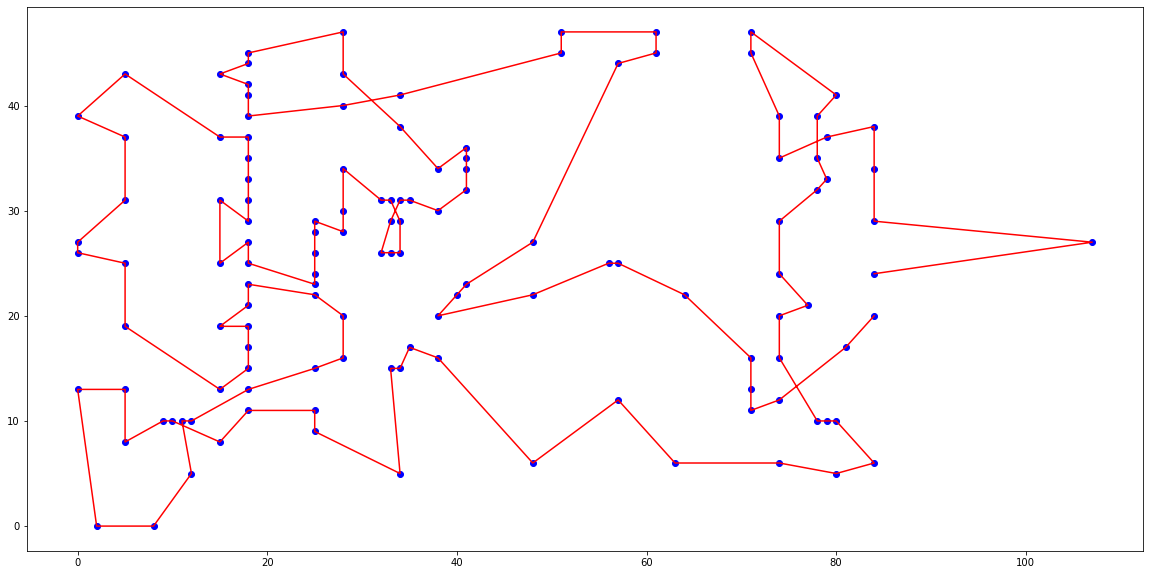

In [8]:
plt.figure(figsize=(20,10))
plt.scatter(df['x'], df['y'], color='blue')
p1_x, p1_y = np.zeros(tour_size), np.zeros(tour_size)
for i in range(tour_size):
    node1 = hof.items[0][i]
    p1_x[i]=(df.loc[node1,'x'])
    p1_y[i]=(df.loc[node1,'y'])
    
plt.plot(p1_x, p1_y, color="red")